In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data_consumos = pd.read_csv('datasets/Evolucion_Consumos_Tarj_20192020.csv', encoding='latin-1')

In [ ]:
df_llave_region = pd.read_csv('datasets/conv_departamento_region.csv', encoding='latin-1')

In [ ]:
data_consumos.sample(5) 

codmes_trx tipo_operacion flg_card flg_digital  flg_categ  \
13800      201904        COMPRAS       TC       NODIG          1   
9744       201903        COMPRAS       TC       NODIG          1   
19087      201905        COMPRAS       TD         DIG          1   
33651      201908        COMPRAS       TD       NODIG          1   
41523      201910        COMPRAS       TC       NODIG          1   

                 categoria                 subcategoria marca_pais_mov  \
13800            EDUCACION      UNIVERSIDAD / INSTITUTO            NAC   
9744        MODA Y BELLEZA                         MODA            NAC   
19087  COMPRAS Y SERVICIOS       JUGUETES Y VIDEOJUEGOS            NAC   
33651      ENTRETENIMIENTO  CINE. TEATRO Y ESPECTACULOS            NAC   
41523                HOGAR                   JARDINERIA            INT   

      pais_departamento       amount     n  
13800         NAC-CUSCO   13740.5300    31  
9744       NAC-AYACUCHO   25144.7900   161  
19087    NAC-SAN MARTIN     550.0000     3  
33651      NAC-AREQUIPA  101042.3500  2033  
41523               INT   25194.2087   136

In [ ]:
df_llave_region.head(5)

pais_departamento         region
0              LIMA           LIMA
1               INT  INTERNACIONAL
2            CALLAO         CALLAO
3       LIMA - PERU           LIMA
4       LA LIBERTAD    LA LIBERTAD

In [ ]:
gb_categoria = data_consumos.groupby(['categoria','codmes_trx'], as_index=False).agg({'n':'sum'})
gb_categoria['codmes_trx'] = gb_categoria['codmes_trx'].astype('str')
gb_categoria

categoria codmes_trx        n
0    ALIMENTACION     201901  3462464
1    ALIMENTACION     201902  3374164
2    ALIMENTACION     201903  3811427
3    ALIMENTACION     201904  3515668
4    ALIMENTACION     201905  3726278
..            ...        ...      ...
233        VIAJES     202001   270193
234        VIAJES     202002   265789
235        VIAJES     202003   153078
236        VIAJES     202004    48188
237        VIAJES     202005    47602

[238 rows x 3 columns]

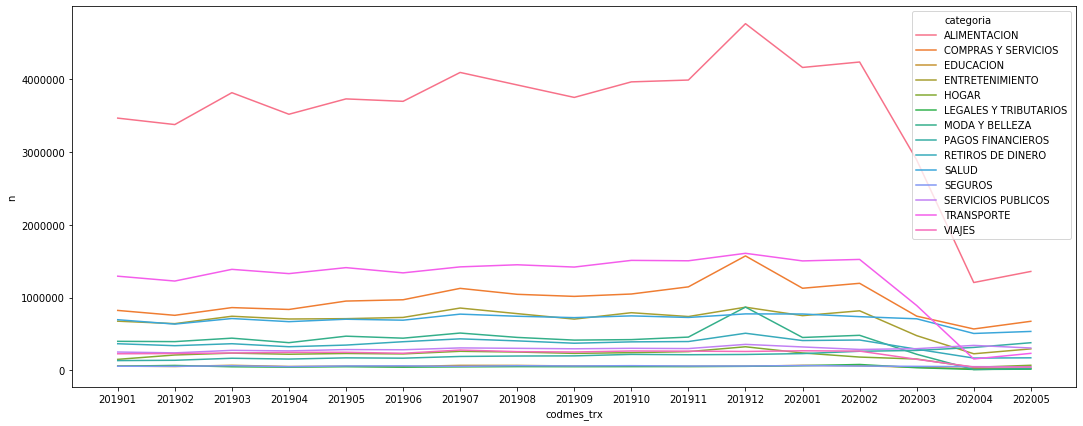

In [ ]:
plt.figure(figsize=(18,7))
ax = sns.lineplot(x="codmes_trx", y="n", data=gb_categoria, hue='categoria')
plt.show()

In [ ]:
gb_n_byDepartamento = data_consumos.groupby(['marca_pais_mov','pais_departamento'], as_index=False)\
                                    .agg({'n':'sum'}).sort_values('n', ascending=False)

gb_n_byDepartamento['pais_departamento'] = gb_n_byDepartamento['pais_departamento'].str.replace('NAC-','')
gb_n_byDepartamento['%n'] = gb_n_byDepartamento['n']/gb_n_byDepartamento['n'].sum()
gb_n_byDepartamento['%cumsum'] = gb_n_byDepartamento['%n'].cumsum()

gb_n_byDepartamento.head(50)

marca_pais_mov         pais_departamento         n        %n   %cumsum
988             NAC                      LIMA  97274446  0.636366  0.636366
0               INT                       INT  25000103  0.163550  0.799916
513             NAC                    CALLAO   4118982  0.026946  0.826862
999             NAC               LIMA - PERU   3285649  0.021495  0.848357
969             NAC               LA LIBERTAD   3260181  0.021328  0.869685
1               NAC                             3058608  0.020009  0.889694
416             NAC                  AREQUIPA   2932998  0.019188  0.908881
1246            NAC                     PIURA   2315381  0.015147  0.924029
870             NAC                       ICA   1541443  0.010084  0.934113
980             NAC                LAMBAYEQUE   1503268  0.009834  0.943947
697             NAC                     CUSCO   1135909  0.007431  0.951378
952             NAC                     JUNIN   1000140  0.006543  0.957921
401             NAC                    ANCASH    815511  0.005335  0.963256
1322            NAC                SAN ISIDRO    674488  0.004412  0.967668
1333            NAC                SAN MARTIN    655744  0.004290  0.971958
510             NAC                 CAJAMARCA    568256  0.003718  0.975676
1009            NAC                    LORETO    543209  0.003554  0.979229
1467            NAC                   UCAYALI    489487  0.003202  0.982432
850             NAC                   HUANUCO    372108  0.002434  0.984866
1410            NAC                     TACNA    348930  0.002283  0.987149
1557            NAC               VISA DIRECT    340816  0.002230  0.989378
1272            NAC                      PUNO    228514  0.001495  0.990873
1453            NAC                    TUMBES    189754  0.001241  0.992115
1103            NAC                  MOQUEGUA    168780  0.001104  0.993219
450             NAC                  AYACUCHO    132800  0.000869  0.994087
1093            NAC                MIRAFLORES     77548  0.000507  0.994595
1205            NAC                     PASCO     68761  0.000450  0.995045
1050            NAC                      MC53     53405  0.000349  0.995394
405             NAC                  APURIMAC     51645  0.000338  0.995732
1448            NAC                  TRUJILLO     41708  0.000273  0.996005
1024            NAC             MADRE DE DIOS     39023  0.000255  0.996260
397             NAC                  AMAZONAS     33397  0.000218  0.996478
726             NAC             DISTRITO DE L     28418  0.000186  0.996664
591             NAC                  CHICLAYO     15968  0.000104  0.996769
700             NAC                     CUZCO     14731  0.000096  0.996865
846             NAC                  HUANCAYO     12130  0.000079  0.996945
845             NAC              HUANCAVELICA     11909  0.000078  0.997022
571             NAC             CERRO DE PASC     11220  0.000073  0.997096
1380            NAC             SKYAIRLINE.CO     10849  0.000071  0.997167
1219            NAC                 PER LIM10      8677  0.000057  0.997224
1142            NAC                   P003703      8422  0.000055  0.997279
593             NAC                  CHIMBOTE      8173  0.000053  0.997332
568             NAC              CERCADO DE L      8149  0.000053  0.997385
1166            NAC                   P024169      7910  0.000052  0.997437
727             NAC  DISTRITO DE L        PER      7569  0.000050  0.997487
1327            NAC               SAN JUAN DE      7232  0.000047  0.997534
1220            NAC                  PER LIM5      7073  0.000046  0.997580
1360            NAC               SANTIAGO DE      7062  0.000046  0.997627
903             NAC                     ISLAY      6902  0.000045  0.997672
977             NAC               LA VICTORIA      6200  0.000041  0.997712

In [ ]:
gb_n_byDepartamento.shape

(1688, 5)

In [ ]:
#gb_n_byDepartamento.to_csv('gb_n_byDepartamento.csv', index=False)

In [ ]:
# Extraer Region

In [ ]:
dicc_grupo_region = {'INTERNACIONAL':'INTERNACIONAL',
                   'LIMA':'LIMA',
                   'CALLAO':'LIMA',
                   'OTROS':'OTROS',
                   'DESCONOCIDO':'DESCONOCIDO'}

In [ ]:
data_consumos['pais_departamento'] = data_consumos['pais_departamento'].str.replace('NAC-','')
data_consumos = data_consumos.merge(df_llave_region, on='pais_departamento', how='left')
data_consumos['region'] = data_consumos['region'].fillna('DESCONOCIDO')
data_consumos['grupo_region'] = data_consumos['region'].map(dicc_grupo_region).fillna('PROVINCIA')

In [ ]:
data_consumos.head(10)

codmes_trx tipo_operacion flg_card flg_digital  flg_categ     categoria  \
0      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
1      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
2      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
3      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
4      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
5      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
6      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
7      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
8      201901        COMPRAS       TC         DIG          1  ALIMENTACION   
9      201901        COMPRAS       TC         DIG          1  ALIMENTACION   

  subcategoria marca_pais_mov pais_departamento      amount    n  \
0   LICORERIAS            INT               INT  21918.9164   89   
1   LICORERIAS            NAC          AREQUIPA    174.5500    4   
2   LICORERIAS            NAC            CALLAO    705.0000    3   
3   LICORERIAS            NAC             CUSCO     25.0000    1   
4   LICORERIAS            NAC               ICA    673.5500    8   
5   LICORERIAS            NAC       LA LIBERTAD     40.0000    1   
6   LICORERIAS            NAC        LAMBAYEQUE     54.0000    2   
7   LICORERIAS            NAC              LIMA  55766.4800  237   
8   LICORERIAS            NAC            LORETO   1144.9400    6   
9   LICORERIAS            NAC             PIURA   8170.0000    6   

          region   grupo_region  
0  INTERNACIONAL  INTERNACIONAL  
1       AREQUIPA      PROVINCIA  
2         CALLAO           LIMA  
3          CUSCO      PROVINCIA  
4            ICA      PROVINCIA  
5    LA LIBERTAD      PROVINCIA  
6     LAMBAYEQUE      PROVINCIA  
7           LIMA           LIMA  
8         LORETO      PROVINCIA  
9          PIURA      PROVINCIA

In [ ]:
data_consumos.groupby(['grupo_region','region'],as_index=False)['codmes_trx'].count().sort_values(['grupo_region','region'])

grupo_region         region  codmes_trx
0     DESCONOCIDO    DESCONOCIDO         335
1   INTERNACIONAL  INTERNACIONAL        3963
2            LIMA         CALLAO        3228
3            LIMA           LIMA        9485
4           OTROS          OTROS        8809
5       PROVINCIA       AMAZONAS        1207
6       PROVINCIA         ANCASH        2785
7       PROVINCIA       APURIMAC        1155
8       PROVINCIA       AREQUIPA        3389
9       PROVINCIA       AYACUCHO        1568
10      PROVINCIA      CAJAMARCA        2539
11      PROVINCIA          CUSCO        3077
12      PROVINCIA   HUANCAVELICA         610
13      PROVINCIA        HUANUCO        2079
14      PROVINCIA            ICA        3001
15      PROVINCIA          JUNIN        2856
16      PROVINCIA    LA LIBERTAD        3670
17      PROVINCIA     LAMBAYEQUE        3220
18      PROVINCIA         LORETO        2721
19      PROVINCIA  MADRE DE DIOS        1265
20      PROVINCIA       MOQUEGUA        1710
21      PROVINCIA          PASCO        1050
22      PROVINCIA          PIURA        3470
23      PROVINCIA           PUNO        1974
24      PROVINCIA     SAN MARTIN        2918
25      PROVINCIA          TACNA        2477
26      PROVINCIA         TUMBES        1903
27      PROVINCIA        UCAYALI        2564

In [ ]:
data_consumos.describe()

codmes_trx  flg_categ        amount             n
count   79028.000000    79028.0  7.902800e+04  7.902800e+04
mean   201934.649757        1.0  2.475698e+05  1.934242e+03
std        43.630943        0.0  2.358154e+06  2.502202e+04
min    201901.000000        1.0  0.000000e+00  1.000000e+00
25%    201905.000000        1.0  3.700000e+02  3.000000e+00
50%    201909.000000        1.0  3.266835e+03  2.000000e+01
75%    202001.000000        1.0  2.876037e+04  1.530000e+02
max    202005.000000        1.0  3.145666e+08  1.530564e+06

In [ ]:
data_consumos.rename(columns={'codmes_trx':'codmes_transaccion','n':'transacciones','amount':'monto'}, inplace=True)
data_consumos.head(2)

codmes_transaccion tipo_operacion flg_card flg_digital  flg_categ  \
0              201901        COMPRAS       TC         DIG          1   
1              201901        COMPRAS       TC         DIG          1   

      categoria subcategoria marca_pais_mov pais_departamento       monto  \
0  ALIMENTACION   LICORERIAS            INT               INT  21918.9164   
1  ALIMENTACION   LICORERIAS            NAC          AREQUIPA    174.5500   

   transacciones         region   grupo_region  
0             89  INTERNACIONAL  INTERNACIONAL  
1              4       AREQUIPA      PROVINCIA

In [ ]:
data_consumos['fecha_transaccion'] = data_consumos['codmes_transaccion'].apply(lambda x: str(x)[0:4]+'-'+str(x)[4:6]+'-01')
data_consumos.sample(3)

codmes_transaccion tipo_operacion flg_card flg_digital  flg_categ  \
64750              202002        COMPRAS       TD         DIG          1   
10834              201903        COMPRAS       TD         DIG          1   
5905               201902        COMPRAS       TD         DIG          1   

                 categoria subcategoria marca_pais_mov pais_departamento  \
64750                HOGAR     MASCOTAS            NAC           UCAYALI   
10834               VIAJES  ALOJAMIENTO            NAC              PUNO   
5905   COMPRAS Y SERVICIOS  ELECTRONICA            NAC            ANCASH   

         monto  transacciones   region grupo_region fecha_transaccion  
64750  1955.00             20  UCAYALI    PROVINCIA        2020-02-01  
10834   774.89              6     PUNO    PROVINCIA        2019-03-01  
5905   2192.50              4   ANCASH    PROVINCIA        2019-02-01

In [ ]:
import datetime as dt
data_consumos['fecha_transaccion'] = data_consumos['fecha_transaccion'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
data_consumos.sample(3)

codmes_transaccion tipo_operacion flg_card flg_digital  flg_categ  \
21600              201906        COMPRAS       TC         DIG          1   
45991              201911        COMPRAS       TC         DIG          1   
43064              201910        COMPRAS       TD         DIG          1   

                categoria                subcategoria marca_pais_mov  \
21600     ENTRETENIMIENTO          BARES Y DISCOTECAS            NAC   
45991               SALUD         FARMACIAS Y BOTICAS            NAC   
43064  SERVICIOS PUBLICOS  TELEFONO. INTERNET Y CABLE            NAC   

      pais_departamento     monto  transacciones       region grupo_region  \
21600            LORETO   3304.50             39       LORETO    PROVINCIA   
45991       LA LIBERTAD  48413.04            526  LA LIBERTAD    PROVINCIA   
43064        SAN MIGUEL     29.90              1         LIMA         LIMA   

      fecha_transaccion  
21600        2019-06-01  
45991        2019-11-01  
43064        2019-10-01

In [ ]:
data_consumos.dtypes

codmes_transaccion             int64
tipo_operacion                object
flg_card                      object
flg_digital                   object
flg_categ                      int64
categoria                     object
subcategoria                  object
marca_pais_mov                object
pais_departamento             object
monto                        float64
transacciones                  int64
region                        object
grupo_region                  object
fecha_transaccion     datetime64[ns]
dtype: object

In [ ]:
data_consumos.to_csv('datasets/data_consumos_tarjetas.csv', index=False)